# RESULTADOS ABSA

Características del archivo absa_results_optimized.parquet

In [1]:
import pandas as pd

# Cargar el archivo generado
output_path = "absa_results_optimized.parquet"
data = pd.read_parquet(output_path)

# Ver las primeras filas
print("Primeras filas del archivo:")
print(data.head())

# Obtener información general del DataFrame
print("\nInformación general del archivo:")
print(data.info())

# Resumen estadístico (solo columnas numéricas)
print("\nResumen estadístico:")
print(data.describe())

# Mostrar un ejemplo de los resultados de aspecto y sentimiento
print("\nEjemplo de 'aspect_sentiments':")
print(data["aspect_sentiments"].iloc[0])

Primeras filas del archivo:
                       id                 user_id  stars  \
0                  855152   109830888913186427251    3.0   
1  9MJaVPd7_UnaKaENGPGQaA  1DBepcTVu6Vymj8Cq5Qfxw    5.0   
2                   24418   110434499591530608348    4.0   
3  CWnjt0cQqYkJQsANOkSkew  SvQVq_-qneq_UCDy5jiaWA    5.0   
4  VKN9P3PtPQqWxaOEOQQuqw  4lQeJ5-1pPORCvbGKwBDQA    5.0   

                                                text                    date  \
0  Be prepared to wait, so you end up drinking a ... 2020-01-26 12:55:06.114   
1  This was so yummy! Everything I had was so goo... 2020-01-17 02:37:50.000   
2  Usually the cheapest gas in the area and surro... 2021-04-20 05:31:02.877   
3  JAMIE & CHIEF TIFFANY are so great at what the... 2021-06-27 19:36:35.000   
4  Now that's what you call a Po Boy!!! I ordered... 2020-10-24 18:03:19.000   

  origin id_business                                         text_clean  \
0      G       31267  be prepared to wait so you end up

El archivo procesado tiene las siguientes características principales:

- Estructura de los datos

Número de filas: 3,000.

Número de columnas: 11.

- Columnas clave:

id, user_id, id_business: Identificadores de reseñas, usuarios y negocios.

stars: Calificación de 1 a 5 asignada por el usuario.

text: Texto original de la reseña.

date: Fecha de la reseña.

text_clean: Versión procesada del texto (limpia y tokenizada).

tokens: Representación tokenizada (detalles para el modelo DistilBERT).

aspect_sentiments: Lista de aspectos evaluados (service, food, price, ambiance) con su respectivo puntaje y sentimiento (positivo o negativo).

- Distribución de datos

Calificaciones (stars):

Media: 4.09 (predominan las reseñas positivas).

Mediana: 5 (muchas reseñas con calificación máxima).

Desviación estándar: 1.34 (varianza relativamente baja).

- Rango: De 1 a 5 estrellas.

- Fechas (date):

Cobertura: Desde el 1 de enero de 2020 hasta el 19 de enero de 2022.

- Mayor concentración de reseñas: Alrededor de finales de 2020 y principios de 2021 (mediana en diciembre de 2020).

- Ejemplo de aspect_sentiments:

Cada reseña tiene una lista de resultados para cada aspecto evaluado (service, food, price, ambiance).

Cada aspecto incluye:

sentiment: Sentimiento detectado (positivo o negativo).

score: Nivel de confianza del modelo en la predicción.

Ejemplo:

[{'aspect': 'service', 'score': 0.9986, 'sentiment': 'NEGATIVE'},
 {'aspect': 'food', 'score': 0.9986, 'sentiment': 'NEGATIVE'},
 {'aspect': 'price', 'score': 0.9988, 'sentiment': 'NEGATIVE'},
 {'aspect': 'ambiance', 'score': 0.9975, 'sentiment': 'NEGATIVE'}]

Memoria y tipo de datos:

Tamaño del archivo: ~257 KB en memoria.

Todas las columnas tienen valores no nulos.

Código para eliminar columnas no relevantes:

In [2]:
# Cargar los datos procesados
import pandas as pd

input_path = "absa_results_optimized.parquet"
data = pd.read_parquet(input_path)

# Seleccionar columnas relevantes
columns_to_keep = ["id_business", "stars", "sentiment", "aspect_sentiments", "text_clean"]
data_filtered = data[columns_to_keep]

# Guardar el nuevo archivo
output_filtered_path = "absa_filtered_results.parquet"
data_filtered.to_parquet(output_filtered_path)

# Confirmar el resultado
print(f"Archivo filtrado guardado en: {output_filtered_path}")
print("\nPrimeras filas del archivo filtrado:")
print(data_filtered.head())


Archivo filtrado guardado en: absa_filtered_results.parquet

Primeras filas del archivo filtrado:
  id_business  stars sentiment  \
0       31267    3.0   neutral   
1       45271    5.0  positive   
2       32023    4.0  positive   
3       50078    5.0  positive   
4       45878    5.0  positive   

                                   aspect_sentiments  \
0  [{'aspect': 'service', 'score': 0.998598515987...   
1  [{'aspect': 'service', 'score': 0.998462557792...   
2  [{'aspect': 'service', 'score': 0.998718738555...   
3  [{'aspect': 'service', 'score': 0.999748885631...   
4  [{'aspect': 'service', 'score': 0.999376714229...   

                                          text_clean  
0  be prepared to wait so you end up drinking a l...  
1  this was so yummy everything i had was so good...  
2  usually the cheapest gas in the area and surro...  
3  jamie chief tiffany are so great at what they ...  
4  now thats what you call a po boy i ordered the...  


# ANALISIS

Se realizará un análisis exploratorio de las columnas clave

- Distribución de estrellas (stars):

Analizar la distribución de calificaciones.
Observar si existen tendencias hacia reseñas más positivas o negativas.

- Distribución de sentimiento general (sentiment):

Identificar cuántas reseñas tienen sentimientos positivos, negativos o neutrales.

- Análisis por aspectos (aspect_sentiments):

Extraer los aspectos individuales (service, food, price, ambiance).

Analizar el sentimiento predominante para cada aspecto.

- Textos representativos (text_clean):

Mostrar ejemplos de textos que acompañen cada tipo de sentimiento (positivo, negativo, neutral).


- A continuacion se presenta el analisis de los resultados obtenidos:

Verificar el tipo de datos de la columna aspect_sentiments  y proceder según corresponda

In [3]:
import pandas as pd

# Cargar el archivo filtrado
filtered_path = "absa_filtered_results.parquet"
df = pd.read_parquet(filtered_path)

In [4]:
# Verificar los primeros valores de la columna 'aspect_sentiments'
print("Primeros valores de 'aspect_sentiments':")
print(df['aspect_sentiments'].head())

Primeros valores de 'aspect_sentiments':
0    [{'aspect': 'service', 'score': 0.998598515987...
1    [{'aspect': 'service', 'score': 0.998462557792...
2    [{'aspect': 'service', 'score': 0.998718738555...
3    [{'aspect': 'service', 'score': 0.999748885631...
4    [{'aspect': 'service', 'score': 0.999376714229...
Name: aspect_sentiments, dtype: object


Importar librerías y cargar datos:

In [5]:
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt

In [6]:
# Cargar los datos filtrados
file_path = "absa_filtered_results.parquet"
df = pd.read_parquet(file_path)

In [7]:
# Inspeccionar los datos
print("Primeras filas del archivo cargado:")
print(df.head())
print("\nInformación general del DataFrame:")
print(df.info())


Primeras filas del archivo cargado:
  id_business  stars sentiment  \
0       31267    3.0   neutral   
1       45271    5.0  positive   
2       32023    4.0  positive   
3       50078    5.0  positive   
4       45878    5.0  positive   

                                   aspect_sentiments  \
0  [{'aspect': 'service', 'score': 0.998598515987...   
1  [{'aspect': 'service', 'score': 0.998462557792...   
2  [{'aspect': 'service', 'score': 0.998718738555...   
3  [{'aspect': 'service', 'score': 0.999748885631...   
4  [{'aspect': 'service', 'score': 0.999376714229...   

                                          text_clean  
0  be prepared to wait so you end up drinking a l...  
1  this was so yummy everything i had was so good...  
2  usually the cheapest gas in the area and surro...  
3  jamie chief tiffany are so great at what they ...  
4  now thats what you call a po boy i ordered the...  

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 e

Análisis de distribución de estrellas:

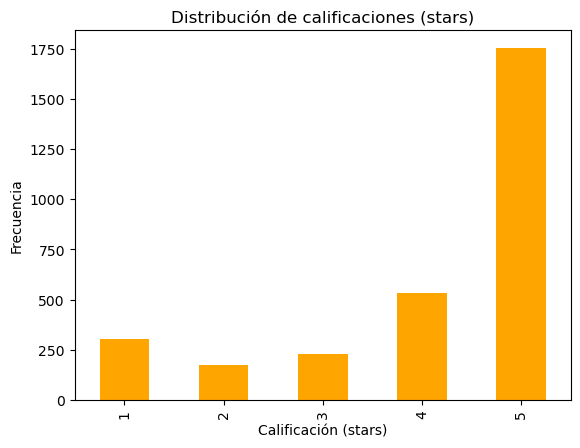

In [8]:
# Asegurarse de que los valores en la columna 'stars' sean enteros
df['stars'] = df['stars'].astype(int)

# Distribución de las calificaciones
df['stars'].value_counts().sort_index().plot(
    kind='bar', color='orange', title='Distribución de calificaciones (stars)')
plt.xlabel('Calificación (stars)')
plt.ylabel('Frecuencia')
plt.show()

Analizar la Columna aspect_sentiments

a) Inspeccionar la estructura de aspect_sentiments

In [9]:
# Mostrar un ejemplo detallado
print("\nEjemplo de aspect_sentiments:")
print(df['aspect_sentiments'].iloc[0])



Ejemplo de aspect_sentiments:
[{'aspect': 'service', 'score': 0.9985985159873962, 'sentiment': 'NEGATIVE'}
 {'aspect': 'food', 'score': 0.9986441731452942, 'sentiment': 'NEGATIVE'}
 {'aspect': 'price', 'score': 0.998759388923645, 'sentiment': 'NEGATIVE'}
 {'aspect': 'ambiance', 'score': 0.9975025057792664, 'sentiment': 'NEGATIVE'}]


b) Contar la cantidad de aspectos detectados por fila

In [10]:
# Agregar una columna con el número de aspectos detectados
df['num_aspects'] = df['aspect_sentiments'].apply(len)

# Resumen de la distribución de aspectos
print("\nDistribución del número de aspectos detectados:")
print(df['num_aspects'].value_counts())



Distribución del número de aspectos detectados:
num_aspects
4    3000
Name: count, dtype: int64


Descomponer aspect_sentiments en Columnas Separadas

In [11]:
# Función para extraer aspectos, puntajes y sentimientos
def extract_aspects(aspects_list):
    aspect_data = {}
    for aspect in aspects_list:
        aspect_name = aspect['aspect']
        aspect_data[f"{aspect_name}_score"] = aspect['score']
        aspect_data[f"{aspect_name}_sentiment"] = aspect['sentiment']
    return aspect_data

In [12]:
# Expandir aspectos en columnas separadas
aspects_df = df['aspect_sentiments'].apply(extract_aspects).apply(pd.Series)

In [13]:
# Combinar con el DataFrame original
df_expanded = pd.concat([df, aspects_df], axis=1)

In [14]:
# Mostrar las primeras filas del DataFrame expandido
print("\nPrimeras filas del DataFrame expandido con aspectos:")
print(df_expanded.head())


Primeras filas del DataFrame expandido con aspectos:
  id_business  stars sentiment  \
0       31267      3   neutral   
1       45271      5  positive   
2       32023      4  positive   
3       50078      5  positive   
4       45878      5  positive   

                                   aspect_sentiments  \
0  [{'aspect': 'service', 'score': 0.998598515987...   
1  [{'aspect': 'service', 'score': 0.998462557792...   
2  [{'aspect': 'service', 'score': 0.998718738555...   
3  [{'aspect': 'service', 'score': 0.999748885631...   
4  [{'aspect': 'service', 'score': 0.999376714229...   

                                          text_clean  num_aspects  \
0  be prepared to wait so you end up drinking a l...            4   
1  this was so yummy everything i had was so good...            4   
2  usually the cheapest gas in the area and surro...            4   
3  jamie chief tiffany are so great at what they ...            4   
4  now thats what you call a po boy i ordered the...       

Análisis Estadístico de los Resultados

a) Distribución de Sentimientos Generales

In [15]:
# Distribución de la columna 'sentiment'
sentiment_distribution = df_expanded['sentiment'].value_counts(normalize=True) * 100
print("\nDistribución de sentimientos generales (%):")
print(sentiment_distribution)


Distribución de sentimientos generales (%):
sentiment
positive    76.333333
negative    16.000000
neutral      7.666667
Name: proportion, dtype: float64


Gráfico de barras que muestra el porcentaje de reseñas clasificadas como positivas, negativas o neutrales:

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

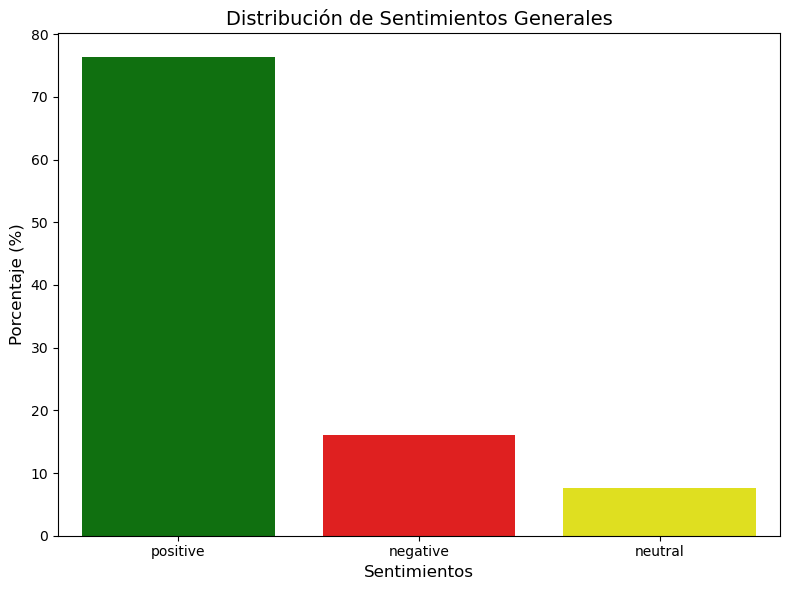

In [17]:
# Diccionario de colores personalizados
custom_colors = {"positive": "green", "negative": "red", "neutral": "yellow"}

# Gráfico de barras con colores personalizados
plt.figure(figsize=(8, 6))
sns.barplot(
    x=sentiment_distribution.index,
    y=sentiment_distribution.values,
    hue=sentiment_distribution.index,  # Asignamos 'hue' al índice de los sentimientos
    palette=custom_colors,  # Colores personalizados
    legend=False  # Desactivamos la leyenda
)
plt.title("Distribución de Sentimientos Generales", fontsize=14)
plt.ylabel("Porcentaje (%)", fontsize=12)
plt.xlabel("Sentimientos", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

b) Promedio de Puntajes por Aspecto

In [18]:
# Calcular el promedio de puntajes por aspecto
aspect_scores = [col for col in df_expanded.columns if col.endswith('_score')]
avg_scores = df_expanded[aspect_scores].mean().sort_values(ascending=False)

print("\nPromedio de puntajes por aspecto:")
print(avg_scores)



Promedio de puntajes por aspecto:
ambiance_score    0.980286
price_score       0.978958
service_score     0.978379
food_score        0.978028
dtype: float64


Gráfico de barras horizontales que ordena los aspectos según su puntaje promedio:

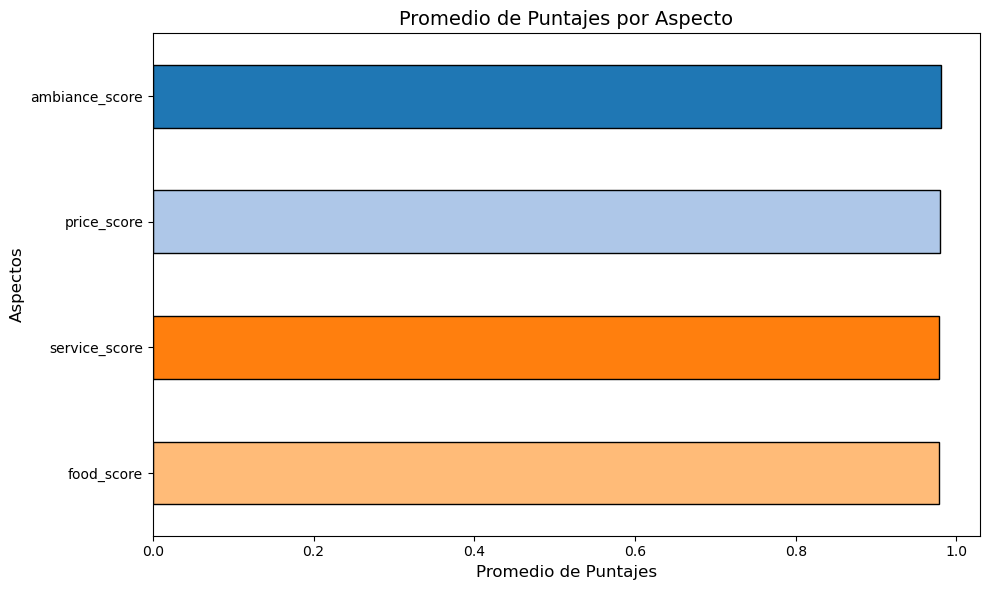

In [19]:
# Calcular el promedio de puntajes por aspecto
aspect_scores = [col for col in df_expanded.columns if col.endswith('_score')]
avg_scores = df_expanded[aspect_scores].mean().sort_values(ascending=False)

# Generar un conjunto de colores
colors = sns.color_palette("tab20", len(avg_scores))  # Usa una paleta con colores variados

# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
avg_scores.plot(kind='barh', color=colors, edgecolor="black")
plt.title("Promedio de Puntajes por Aspecto", fontsize=14)
plt.xlabel("Promedio de Puntajes", fontsize=12)
plt.ylabel("Aspectos", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()  # Invertir el orden para mostrar el mayor primero
plt.tight_layout()
plt.show()

c) Frecuencia de Sentimientos por Aspecto

In [20]:
# Calcular la frecuencia de sentimientos por aspecto
aspect_sentiments = [col for col in df_expanded.columns if col.endswith('_sentiment')]
for aspect in aspect_sentiments:
    print(f"\nDistribución de sentimientos para {aspect.replace('_sentiment', '')}:")
    print(df_expanded[aspect].value_counts(normalize=True) * 100)



Distribución de sentimientos para service:
service_sentiment
POSITIVE    70.633333
NEGATIVE    29.366667
Name: proportion, dtype: float64

Distribución de sentimientos para food:
food_sentiment
POSITIVE    71.0
NEGATIVE    29.0
Name: proportion, dtype: float64

Distribución de sentimientos para price:
price_sentiment
POSITIVE    70.333333
NEGATIVE    29.666667
Name: proportion, dtype: float64

Distribución de sentimientos para ambiance:
ambiance_sentiment
POSITIVE    73.7
NEGATIVE    26.3
Name: proportion, dtype: float64


Gráficos de barras individuales para cada aspecto, mostrando la proporción de sentimientos (positivo, negativo, neutral) asociados con cada uno:

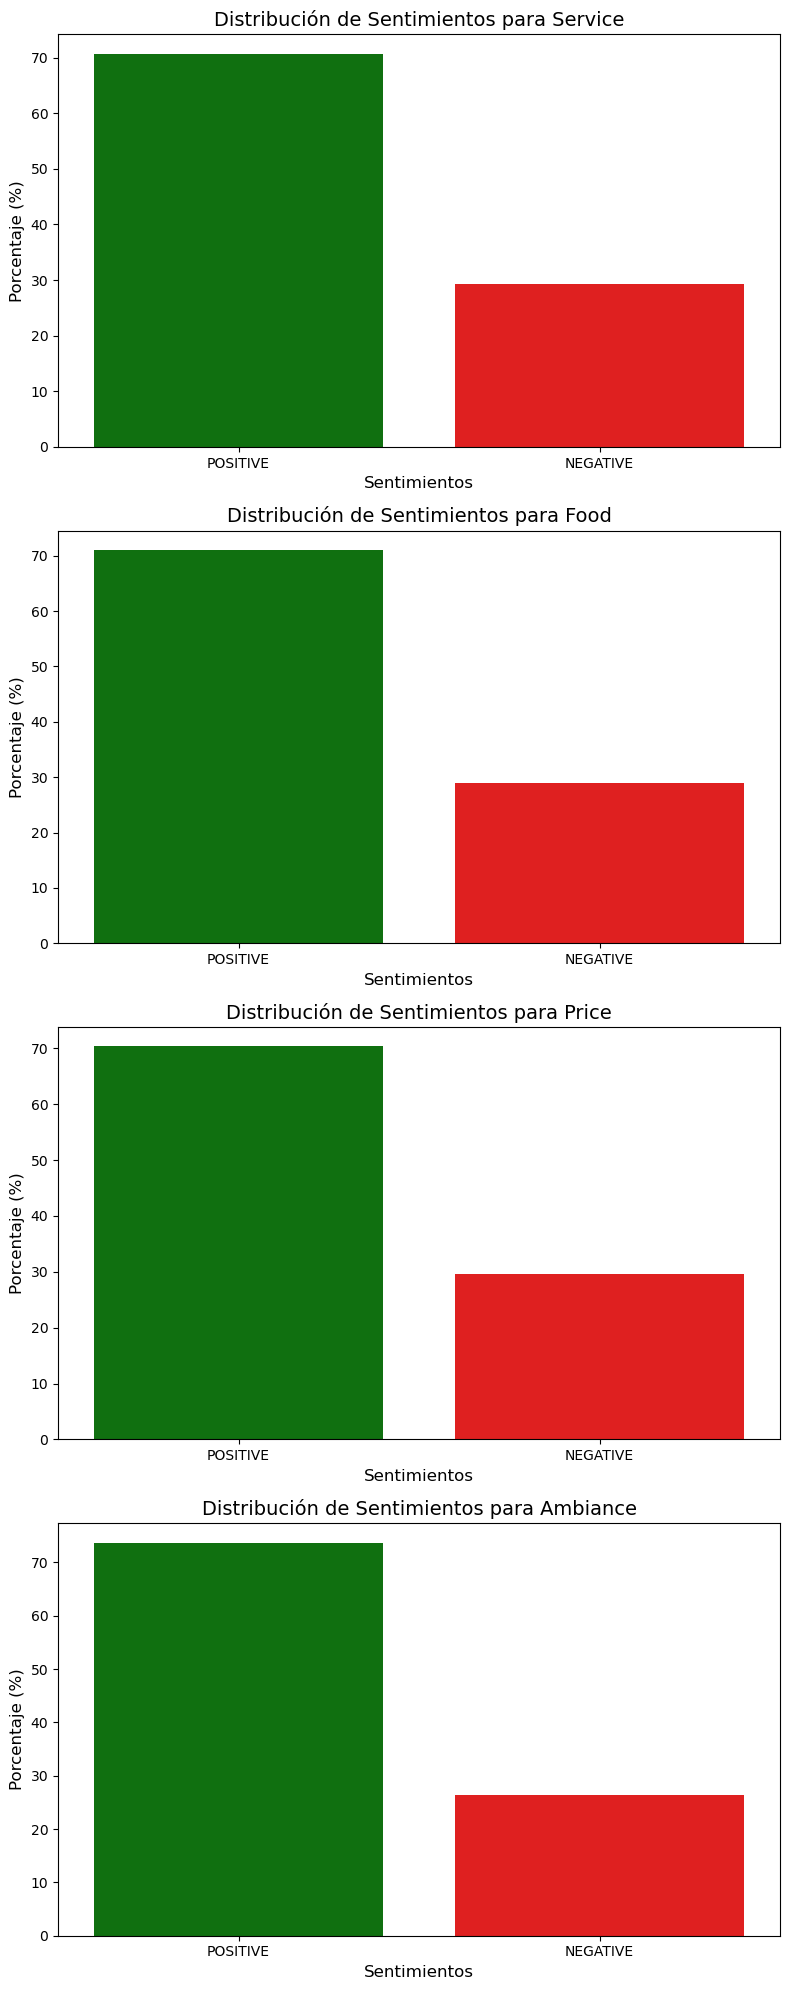

In [21]:
# Calcular la frecuencia de sentimientos por aspecto
aspect_sentiments = [col for col in df_expanded.columns if col.endswith('_sentiment')]

# Crear subgráficos para cada aspecto
num_aspects = len(aspect_sentiments)
fig, axes = plt.subplots(nrows=num_aspects, ncols=1, figsize=(8, 5 * num_aspects))

# Definir los colores personalizados
custom_colors = {
    'POSITIVE': 'green',
    'NEGATIVE': 'red',
    'NEUTRAL': 'yellow'
}


for i, aspect in enumerate(aspect_sentiments):
    sentiment_freq = df_expanded[aspect].value_counts(normalize=True) * 100
    ax = axes[i] if num_aspects > 1 else axes
    sns.barplot(x=sentiment_freq.index, y=sentiment_freq.values, ax=ax, hue=sentiment_freq.index, palette=custom_colors, legend=False)    
    ax.set_title(f"Distribución de Sentimientos para {aspect.replace('_sentiment', '').capitalize()}", fontsize=14)
    ax.set_ylabel("Porcentaje (%)", fontsize=12)
    ax.set_xlabel("Sentimientos", fontsize=12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()


Guardar el DataFrame Expandido para Uso Posterior

In [22]:
# Guardar los resultados expandidos
expanded_path = "absa_expanded_results.parquet"
df_expanded.to_parquet(expanded_path, index=False)
print(f"\nArchivo expandido guardado en: {expanded_path}")



Archivo expandido guardado en: absa_expanded_results.parquet


# Preparar Datos para el Sistema de Recomendación

a) Agregar una Columna de Relevancia por Aspecto

In [23]:
# Definir umbral para considerar aspectos relevantes
threshold = 0.8

# Crear una columna indicando relevancia (1 = relevante, 0 = no relevante)
df_expanded['relevance'] = df_expanded[aspect_scores].max(axis=1).apply(lambda x: 1 if x > threshold else 0)

# Mostrar las primeras filas con la columna de relevancia
print("\nPrimeras filas con relevancia:")
print(df_expanded[['id_business', 'relevance']].head())



Primeras filas con relevancia:
  id_business  relevance
0       31267          1
1       45271          1
2       32023          1
3       50078          1
4       45878          1


b) Guardar solo las columnas relevantes para el sistema de recomendación

In [24]:
# Seleccionar columnas relevantes
recommendation_data = df_expanded[['id_business', 'stars', 'sentiment', 'relevance'] + aspect_scores + aspect_sentiments]

# Guardar los datos preparados para el sistema de recomendación
recommendation_path = "recommendation_data.parquet"
recommendation_data.to_parquet(recommendation_path, index=False)
print(f"\nArchivo para sistema de recomendación guardado en: {recommendation_path}")



Archivo para sistema de recomendación guardado en: recommendation_data.parquet


Características del archivo generado "recommendation_data.parquet" después de realizar la preparación de datos para el sistema de recomendación:

In [25]:
# Cargar el archivo generado para el sistema de recomendación
recommendation_data = pd.read_parquet("recommendation_data.parquet")

# Mostrar información general del DataFrame
print("\nInformación general del DataFrame para el sistema de recomendación:")
print(recommendation_data.info())

# Mostrar las primeras filas del archivo
print("\nPrimeras filas del archivo para el sistema de recomendación:")
print(recommendation_data.head())



Información general del DataFrame para el sistema de recomendación:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_business         3000 non-null   object 
 1   stars               3000 non-null   int64  
 2   sentiment           3000 non-null   object 
 3   relevance           3000 non-null   int64  
 4   service_score       3000 non-null   float64
 5   food_score          3000 non-null   float64
 6   price_score         3000 non-null   float64
 7   ambiance_score      3000 non-null   float64
 8   service_sentiment   3000 non-null   object 
 9   food_sentiment      3000 non-null   object 
 10  price_sentiment     3000 non-null   object 
 11  ambiance_sentiment  3000 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 281.4+ KB
None

Primeras filas del archivo para el sistema de recomendación:
  id_bu

El archivo "recommendation_data.parquet" contiene 3000 filas y 12 columnas, con la siguiente información:

- Columnas:

id_business: Identificador único del negocio.

stars: Calificación general del negocio (de 1 a 5).

sentiment: Sentimiento general del comentario (positivo, negativo, neutral).

relevance: Indicador binario de la relevancia del negocio para el sistema de recomendación (1 = relevante, 0 = no relevante).

service_score: Puntaje de sentimiento asociado al aspecto "servicio" del negocio.

food_score: Puntaje de sentimiento asociado al aspecto "comida" del negocio.

price_score: Puntaje de sentimiento asociado al aspecto "precio" del negocio.

ambiance_score: Puntaje de sentimiento asociado al aspecto "ambiente" del negocio.

service_sentiment: Sentimiento asociado al aspecto "servicio" (positivo, negativo, neutral).

food_sentiment: Sentimiento asociado al aspecto "comida" (positivo, negativo, neutral).

price_sentiment: Sentimiento asociado al aspecto "precio" (positivo, negativo, neutral).

ambiance_sentiment: Sentimiento asociado al aspecto "ambiente" (positivo, negativo, neutral).

- Tipo de Datos:

Numericos: Las columnas stars, service_score, food_score, price_score, y ambiance_score son de tipo float64.

Categoricos: Las columnas sentiment, service_sentiment, food_sentiment, price_sentiment, y ambiance_sentiment son de tipo object (strings).

Categoricos Binarios: La columna relevance es de tipo int64.

El archivo está listo para ser utilizado en un sistema de recomendación de restaurantes, ya que tiene información detallada sobre los aspectos clave de los restaurantes (servicio, comida, precio, ambiente) junto con el sentimiento asociado a cada aspecto y la calificación general del negocio.

Cambiar el tipo de dato de la columna id_business a int64

In [26]:
import pandas as pd

# Cargar el archivo .parquet
df = pd.read_parquet("recommendation_data.parquet")

# Convertir la columna 'id_business' a int64
df['id_business'] = df['id_business'].astype('int64')

# Verificar el cambio
print(df.info())

# (Opcional) Guardar el DataFrame actualizado en un nuevo archivo .parquet
df.to_parquet("recommendation_data_updated.parquet", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_business         3000 non-null   int64  
 1   stars               3000 non-null   int64  
 2   sentiment           3000 non-null   object 
 3   relevance           3000 non-null   int64  
 4   service_score       3000 non-null   float64
 5   food_score          3000 non-null   float64
 6   price_score         3000 non-null   float64
 7   ambiance_score      3000 non-null   float64
 8   service_sentiment   3000 non-null   object 
 9   food_sentiment      3000 non-null   object 
 10  price_sentiment     3000 non-null   object 
 11  ambiance_sentiment  3000 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 281.4+ KB
None
